# Task 2
---
## Predictive modeling of customer bookings

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {"Mon": 1,
           "Tue": 2,
           "Wed": 3,
           "Thu": 4,
           "Fri": 5,
           "Sat": 6,
           "Sun": 7,}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [8]:
y = df['booking_complete']
X = df.drop('booking_complete', axis=1)

In [9]:
X = pd.get_dummies(X, drop_first=False)

In [10]:
# Check the result
print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")
print(f"Feature columns after encoding:\n{X.columns.tolist()}")

Feature matrix shape: (50000, 917)
Target variable shape: (50000,)
Feature columns after encoding:
['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'sales_channel_Internet', 'sales_channel_Mobile', 'trip_type_CircleTrip', 'trip_type_OneWay', 'trip_type_RoundTrip', 'route_AKLDEL', 'route_AKLHGH', 'route_AKLHND', 'route_AKLICN', 'route_AKLKIX', 'route_AKLKTM', 'route_AKLKUL', 'route_AKLMRU', 'route_AKLPEK', 'route_AKLPVG', 'route_AKLTPE', 'route_AORICN', 'route_AORKIX', 'route_AORKTM', 'route_AORMEL', 'route_AORPER', 'route_AORPUS', 'route_BBIMEL', 'route_BBIOOL', 'route_BBIPER', 'route_BBISYD', 'route_BDOCTS', 'route_BDOCTU', 'route_BDOHGH', 'route_BDOICN', 'route_BDOIKA', 'route_BDOKIX', 'route_BDOMEL', 'route_BDOOOL', 'route_BDOPEK', 'route_BDOPER', 'route_BDOPUS', 'route_BDOPVG', 'route_BDOSYD', 'route_BDOTPE', 'route_BDOWUH', 'route_BDOXIY', 'route_BKICKG', 'r

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [12]:
# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print("Model training complete!")

Training set size: 40000
Testing set size: 10000
Model training complete!


In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [17]:
# Print classification report (precision, recall, f1-score)
print("Classification Report:")
print("=" * 50)
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.52      0.14      0.23      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.56      0.57     10000
weighted avg       0.82      0.85      0.82     10000



In [18]:
# Display confusion matrix
print("\nConfusion Matrix:")
print("=" * 50)
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion Matrix:
[[8323  197]
 [1267  213]]


In [19]:
# Optional: Display confusion matrix with labels for clarity
print("\nConfusion Matrix (with labels):")
print("=" * 50)
print(f"                Predicted No  Predicted Yes")
print(f"Actual No       {cm[0][0]:<13} {cm[0][1]}")
print(f"Actual Yes      {cm[1][0]:<13} {cm[1][1]}")


Confusion Matrix (with labels):
                Predicted No  Predicted Yes
Actual No       8323          197
Actual Yes      1267          213


In [20]:
# Calculate and display accuracy
accuracy = rf_classifier.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

Model Accuracy: 0.8536 (85.36%)


In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')

In [23]:
# Display results
print("Cross-Validation Results (5-Fold):")
print("=" * 50)
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f} ({score*100:.2f}%)")

Cross-Validation Results (5-Fold):
Fold 1: 0.8494 (84.94%)
Fold 2: 0.7474 (74.74%)
Fold 3: 0.7056 (70.56%)
Fold 4: 0.4876 (48.76%)
Fold 5: 0.7618 (76.18%)


In [24]:
print("=" * 50)
print(f"Mean Accuracy: {cv_scores.mean():.4f} ({cv_scores.mean()*100:.2f}%)")
print(f"Standard Deviation: {cv_scores.std():.4f} ({cv_scores.std()*100:.2f}%)")

Mean Accuracy: 0.7104 (71.04%)
Standard Deviation: 0.1208 (12.08%)


In [25]:
import matplotlib.pyplot as plt

In [26]:
# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

In [27]:
# Create a DataFrame matching importance scores with feature names
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

In [28]:
# Sort by importance in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

In [29]:
# Display top 15 features
print("Top 15 Most Important Features:")
print("=" * 60)
print(importance_df.head(15).to_string(index=False))

Top 15 Most Important Features:
                 Feature  Importance
           purchase_lead    0.157321
             flight_hour    0.126737
          length_of_stay    0.114576
              flight_day    0.090465
          num_passengers    0.048143
         flight_duration    0.034545
 booking_origin_Malaysia    0.028254
   wants_in_flight_meals    0.022374
booking_origin_Australia    0.021109
    wants_preferred_seat    0.018032
     wants_extra_baggage    0.015835
            route_PENTPE    0.007016
booking_origin_Indonesia    0.005258
    sales_channel_Mobile    0.005211
  sales_channel_Internet    0.005104


In [30]:
# Create horizontal bar chart for top 15 features
top_15 = importance_df.head(15)

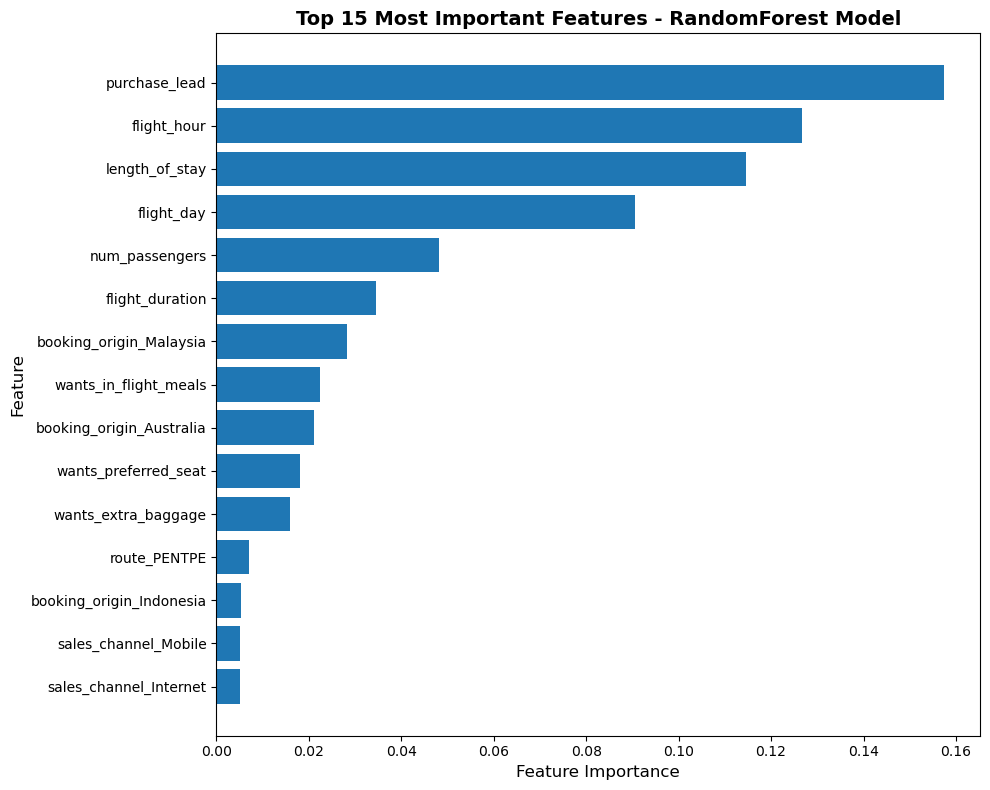

In [31]:
plt.figure(figsize=(10, 8))
plt.barh(range(len(top_15)), top_15['Importance'], align='center')
plt.yticks(range(len(top_15)), top_15['Feature'])
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 15 Most Important Features - RandomForest Model', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.tight_layout()

In [32]:
# Show percentage contribution
print("\n" + "=" * 60)
print(f"Top 15 features account for {top_15['Importance'].sum():.2%} of total importance")


Top 15 features account for 70.00% of total importance
